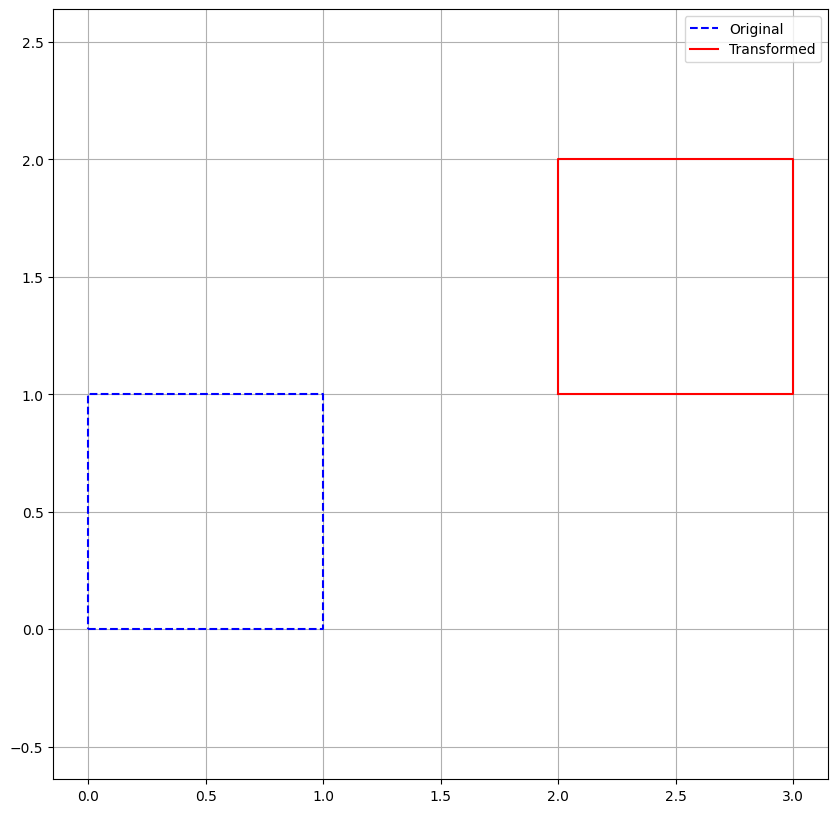

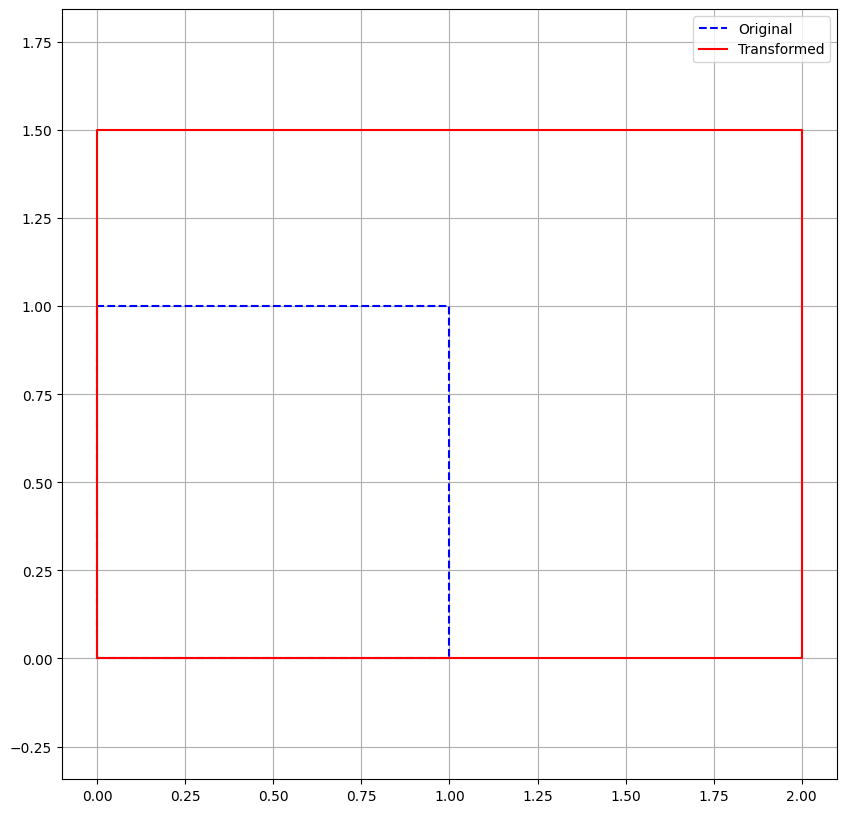

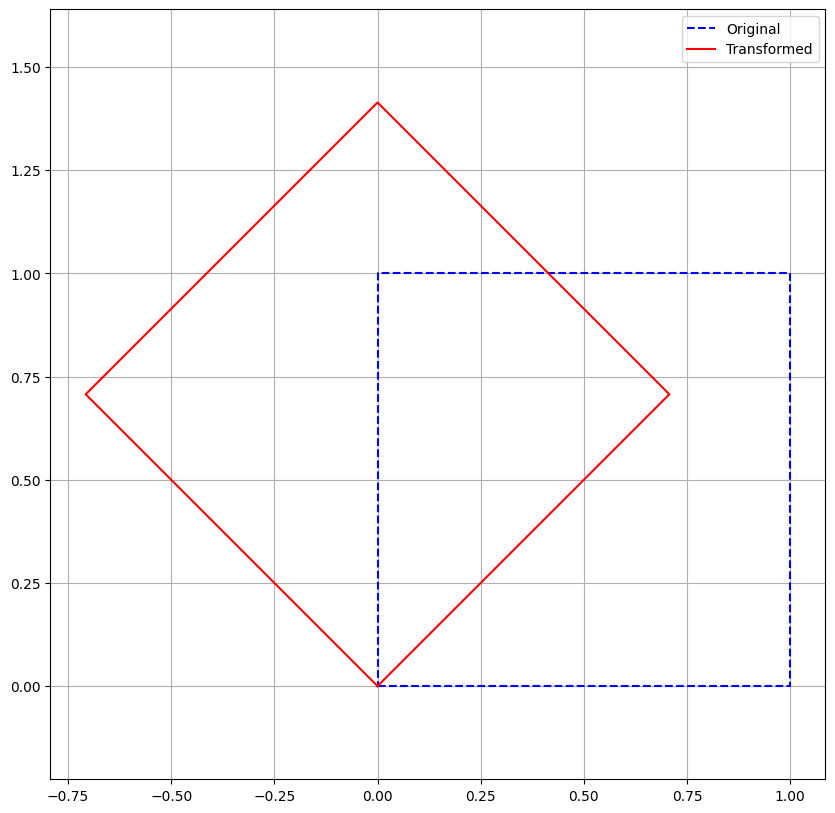

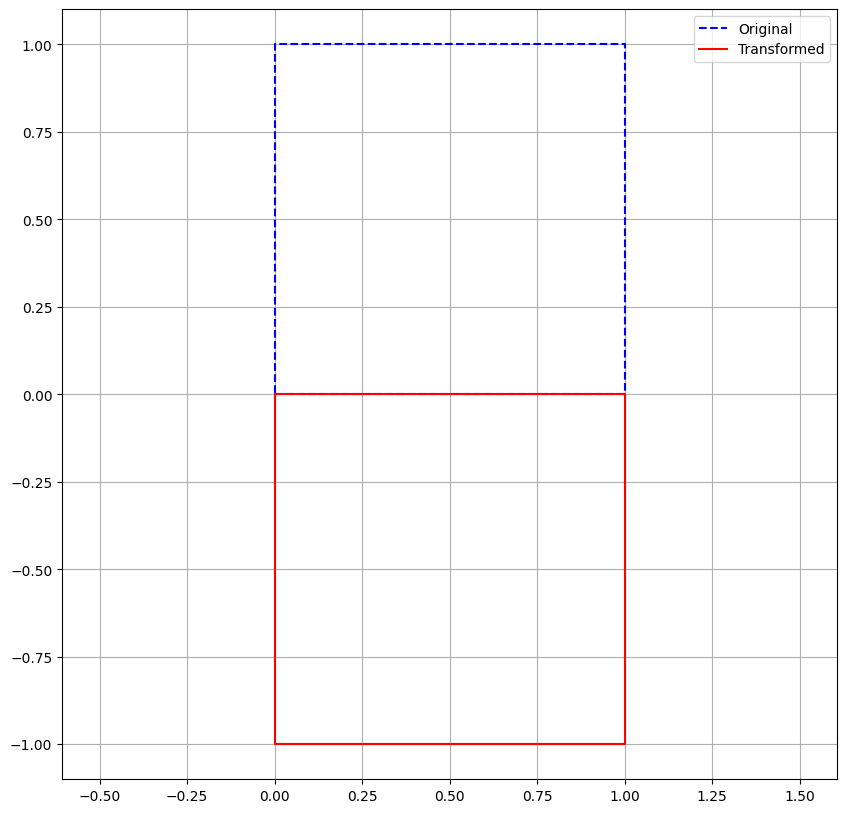

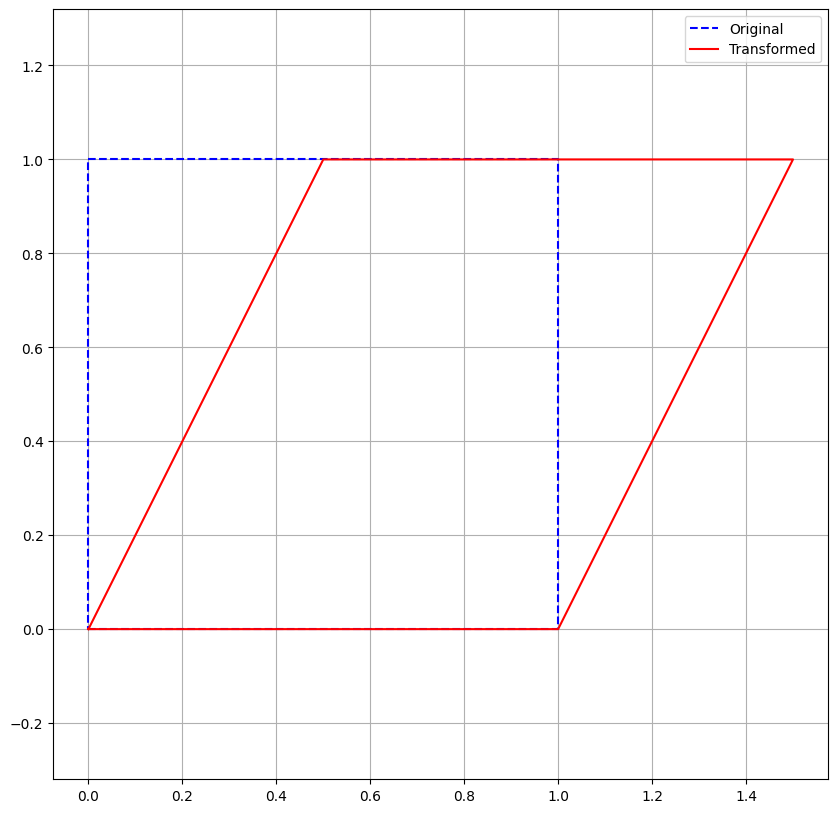

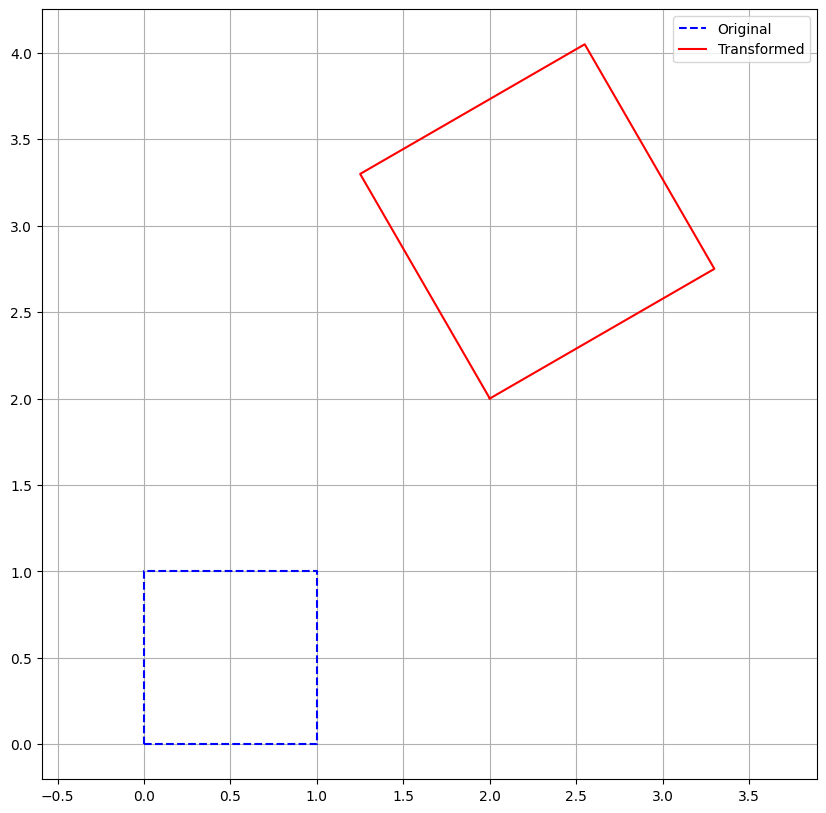

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Transform2D:
    def __init__(self, points):
        """
        Initialize with a set of points defining a 2D object
        points: numpy array of shape (n, 2) where n is number of vertices
        """
        self.points = np.array(points)
        self.original = self.points.copy()

    def translate(self, tx, ty):
        """Translate object by tx and ty"""
        translation_matrix = np.array([[1, 0, tx],
                                     [0, 1, ty],
                                     [0, 0, 1]])
        self._apply_transformation(translation_matrix)
        return self

    def scale(self, sx, sy):
        """Scale object by sx and sy"""
        scaling_matrix = np.array([[sx, 0, 0],
                                 [0, sy, 0],
                                 [0, 0, 1]])
        self._apply_transformation(scaling_matrix)
        return self

    def rotate(self, angle_degrees):
        """Rotate object by given angle in degrees"""
        angle = np.radians(angle_degrees)
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                                  [np.sin(angle), np.cos(angle), 0],
                                  [0, 0, 1]])
        self._apply_transformation(rotation_matrix)
        return self

    def reflect(self, axis='x'):
        """Reflect object across specified axis"""
        if axis.lower() == 'x':
            reflection_matrix = np.array([[1, 0, 0],
                                        [0, -1, 0],
                                        [0, 0, 1]])
        elif axis.lower() == 'y':
            reflection_matrix = np.array([[-1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 1]])
        self._apply_transformation(reflection_matrix)
        return self

    def shear(self, shx=0, shy=0):
        """Apply shear transformation"""
        shear_matrix = np.array([[1, shx, 0],
                                [shy, 1, 0],
                                [0, 0, 1]])
        self._apply_transformation(shear_matrix)
        return self

    def _apply_transformation(self, matrix):
        """Apply transformation matrix to points"""
        homogeneous_points = np.hstack((self.points, np.ones((len(self.points), 1))))
        transformed_points = homogeneous_points @ matrix.T
        self.points = transformed_points[:, :2]

    def reset(self):
        """Reset points to original position"""
        self.points = self.original.copy()

    def plot(self, show_original=True):
        """Plot the current state of the object"""
        plt.figure(figsize=(10, 10))
        if show_original:
            plt.plot(np.append(self.original[:, 0], self.original[0, 0]),
                    np.append(self.original[:, 1], self.original[0, 1]),
                    'b--', label='Original')
        plt.plot(np.append(self.points[:, 0], self.points[0, 0]),
                np.append(self.points[:, 1], self.points[0, 1]),
                'r-', label='Transformed')
        plt.grid(True)
        plt.legend()
        plt.axis('equal')
        plt.show()

square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
transform = Transform2D(square)

transform.translate(2, 1).plot()
transform.reset()

transform.scale(2, 1.5).plot()
transform.reset()

transform.rotate(45).plot()
transform.reset()

transform.reflect('x').plot()
transform.reset()

transform.shear(0.5, 0).plot()
transform.reset()

transform.rotate(30).scale(1.5, 1.5).translate(2, 2).plot()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Picture1.jpg to Picture1.jpg


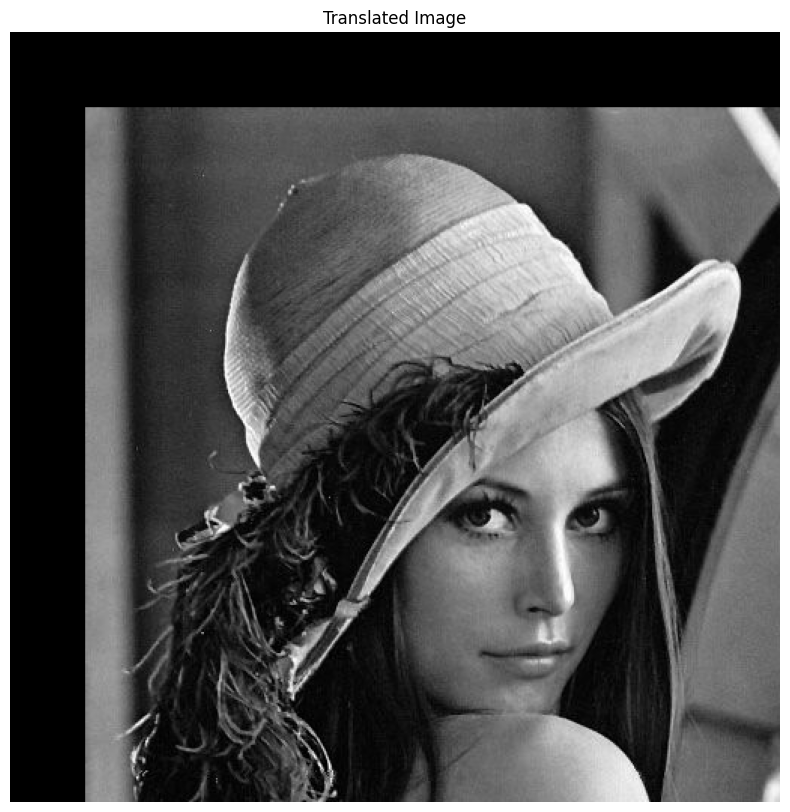

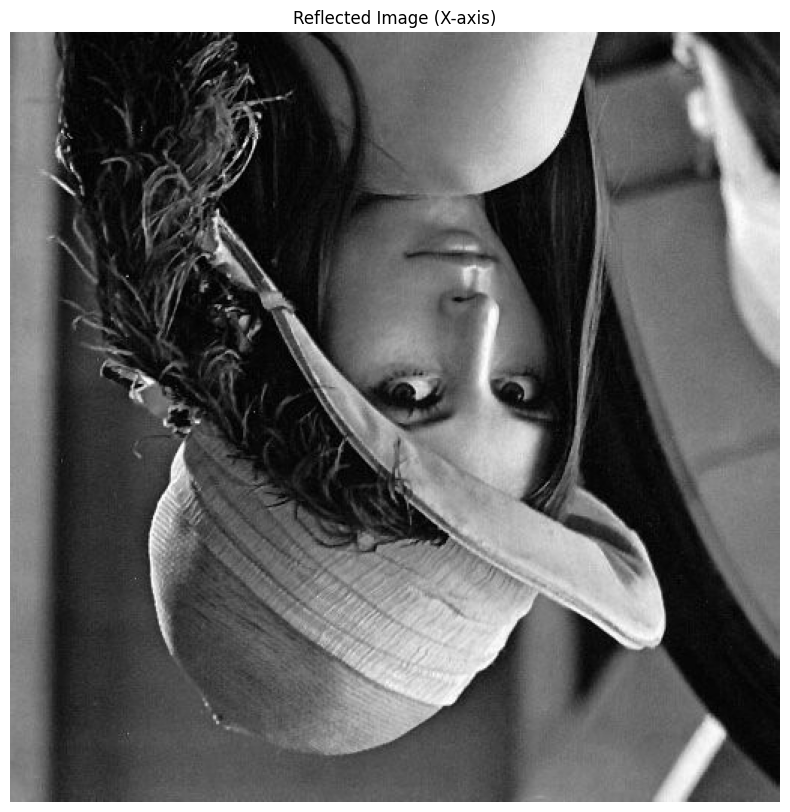

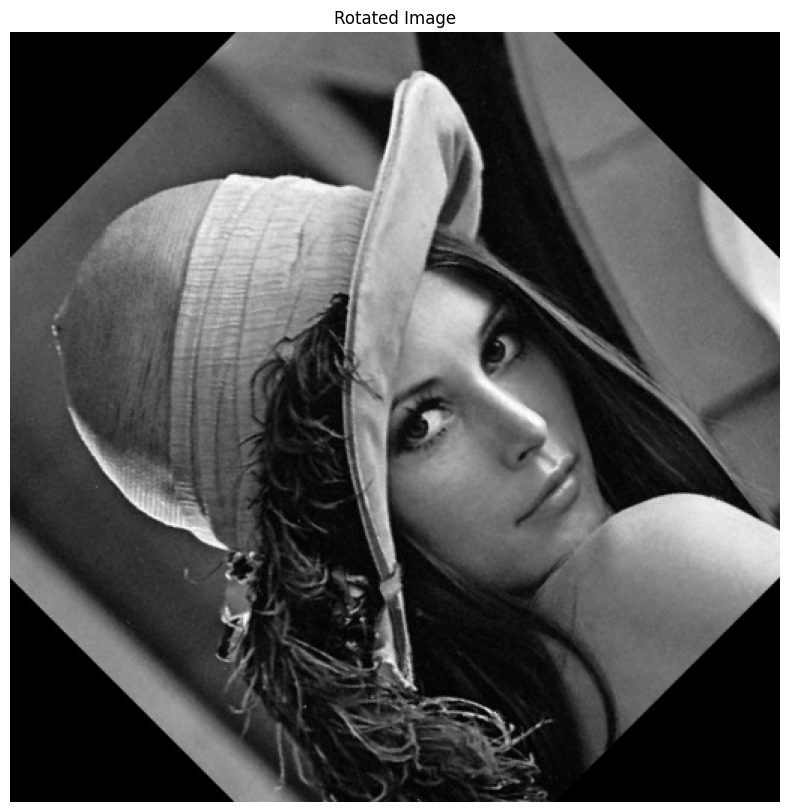

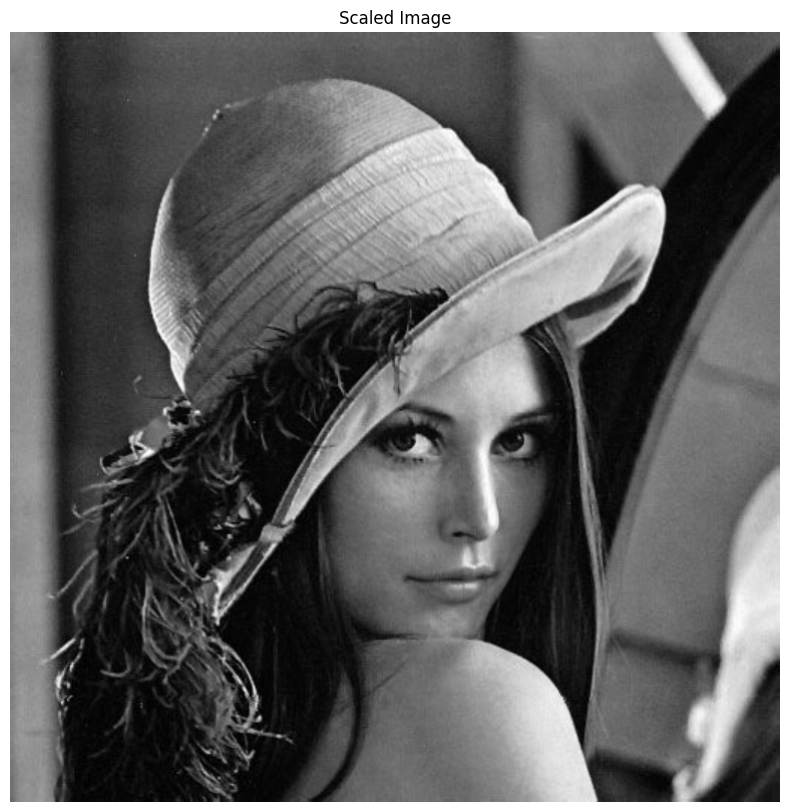

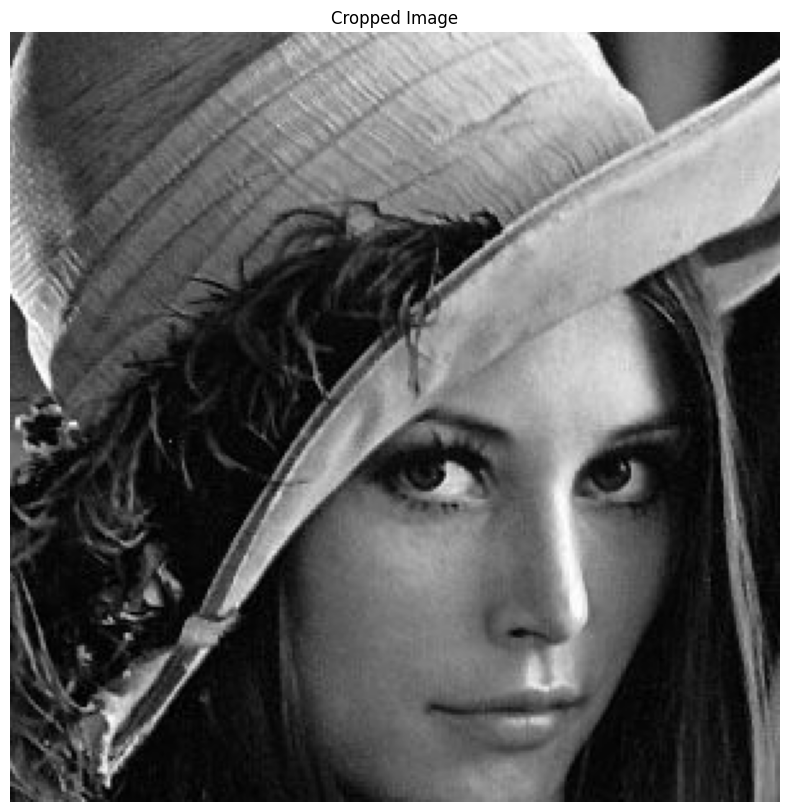

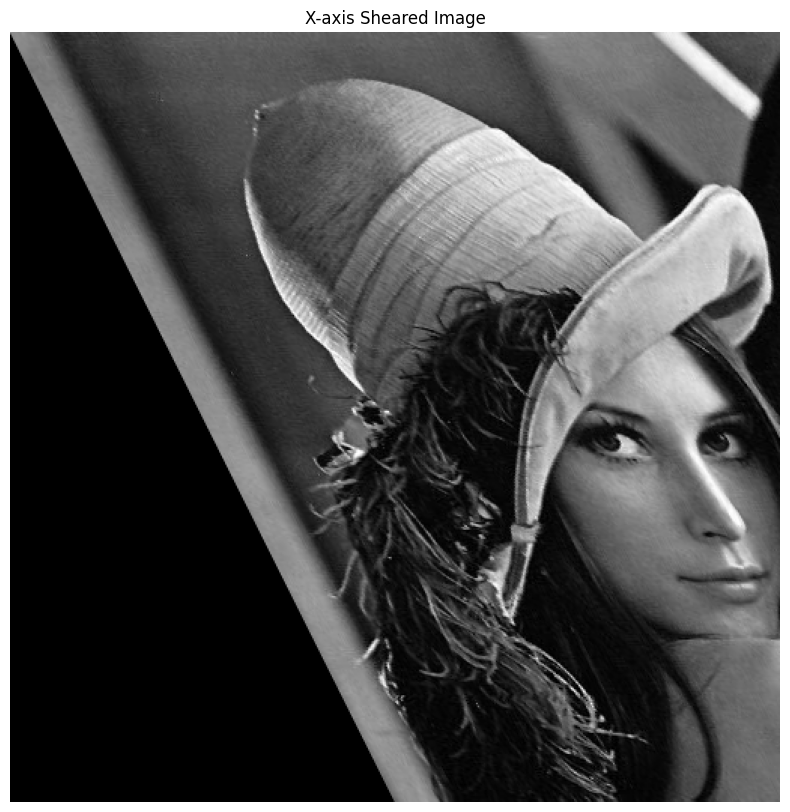

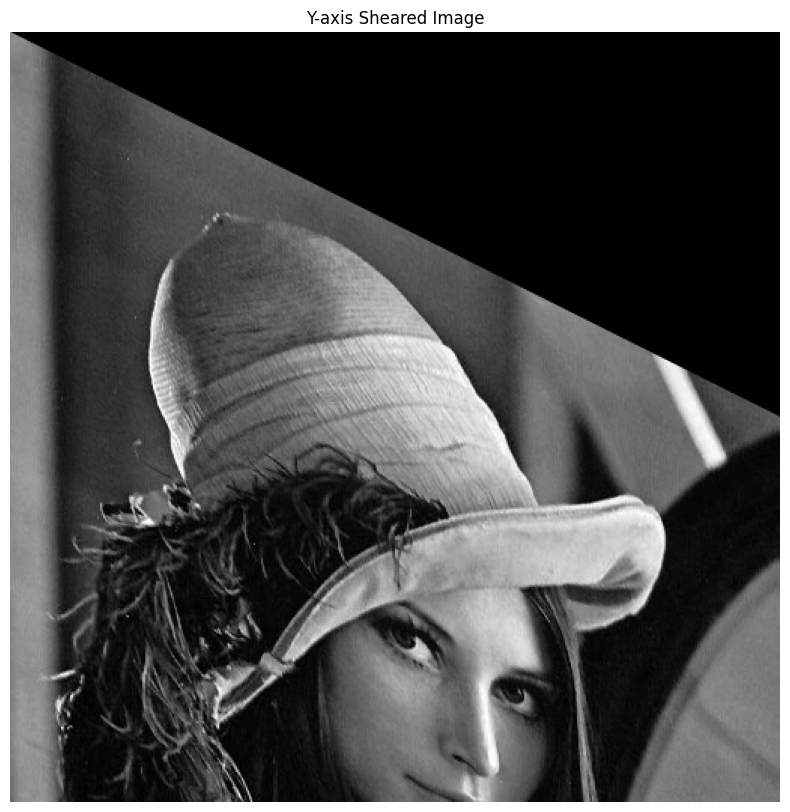

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageTransformer:
    def __init__(self, image_path):
        """Initialize with image path"""
        image_path=list(uploaded.keys())[0]
        self.original = cv2.imread(image_path)
        if self.original is None:
            raise ValueError("Could not load image")
        self.image = self.original.copy()

    def translate(self, tx, ty):
        """Translate image by tx and ty pixels"""
        rows, cols = self.image.shape[:2]
        M = np.float32([[1, 0, tx],
                       [0, 1, ty]])
        self.image = cv2.warpAffine(self.image, M, (cols, rows))
        return self

    def reflect(self, axis='x'):
        """Reflect image across specified axis"""
        if axis.lower() == 'x':
            self.image = cv2.flip(self.image, 0)
        elif axis.lower() == 'y':
            self.image = cv2.flip(self.image, 1)
        return self

    def rotate(self, angle, center=None):
        """Rotate image by given angle"""
        rows, cols = self.image.shape[:2]
        if center is None:
            center = (cols/2, rows/2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        self.image = cv2.warpAffine(self.image, M, (cols, rows))
        return self

    def scale(self, fx, fy):
        """Scale image by fx and fy factors"""
        self.image = cv2.resize(self.image, None, fx=fx, fy=fy)
        return self

    def crop(self, x, y, w, h):
        """Crop image to specified region"""
        self.image = self.image[y:y+h, x:x+w]
        return self

    def shear(self, axis='x', factor=0.5):
        """Apply shear transformation"""
        rows, cols = self.image.shape[:2]
        if axis.lower() == 'x':
            M = np.float32([[1, factor, 0],
                           [0, 1, 0]])
        else:
            M = np.float32([[1, 0, 0],
                           [factor, 1, 0]])
        self.image = cv2.warpAffine(self.image, M, (cols, rows))
        return self

    def reset(self):
        """Reset image to original state"""
        self.image = self.original.copy()
        return self

    def show(self, title='Transformed Image'):
        """Display the image"""
        rgb_img = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(rgb_img)
        plt.title(title)
        plt.axis('off')
        plt.show()

transformer = ImageTransformer('path_to_your_image.jpg')

transformer.translate(50, 50).show('Translated Image')
transformer.reset()

transformer.reflect('x').show('Reflected Image (X-axis)')
transformer.reset()

transformer.rotate(45).show('Rotated Image')
transformer.reset()

transformer.scale(1.5, 1.5).show('Scaled Image')
transformer.reset()

transformer.crop(100, 100, 300, 300).show('Cropped Image')
transformer.reset()

transformer.shear('x').show('X-axis Sheared Image')
transformer.reset()

transformer.shear('y').show('Y-axis Sheared Image')